In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/yelp.xlsx')

In [ ]:
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1000, stop_words='english')

In [ ]:
dtm = cv.fit_transform(df.review)

In [ ]:
word_count = pd.DataFrame({
    'word': cv.get_feature_names(),
    'count': dtm.sum(axis=0).flat
})
word_count.sort_values('count', ascending=False).head(10)

,word,count
246,food,126
498,place,106
265,good,95
668,service,85
268,great,70
347,like,46
834,time,42
583,really,36
328,just,35
56,best,30


In [ ]:
x = dtm
y = df.sentiment

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(800, 1000)

In [ ]:
x_test.shape

(200, 1000)

In [ ]:
y_train

29     0
535    1
695    0
557    0
836    1
      ..
106    1
270    1
860    1
435    0
102    1
Name: sentiment, Length: 800, dtype: int64

In [ ]:
# 아직은 로지스틱회귀랑 똑같음
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [ ]:
# 배치 : 한 번에 모형의 파라미터 조정에 사용하는 데이터(기본 32개)
# 에포크: 전체 데이터를 한 번 처음부터 끝까지 훑는 과정(800 = 32*25)
# 에포크를 거듭할수록 손실은 감소, 정확도는 향상

model.fit(x_train.A, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5300
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5987
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6538
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6900
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.7462
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.7775
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.8012
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.8225
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.8375
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.8500


In [ ]:
model.evaluate(x_test.A, y_test) #결과로 미루어볼 때 과대적합이 되었음을 알 수 있다

7/7 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7500


[0.6487686038017273, 0.75]

### MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# 값의 범위를 0~255에서 0~1로 바꿔줌
# 값이 너무 커지면 학습이 잘 안되므로 나눠주는 것임
x_train = x_train / 255.0

### 이미지 보기

In [ ]:
import matplotlib.pyplot as plt

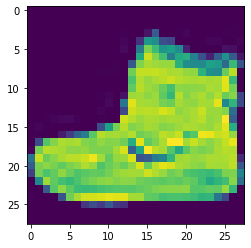

In [ ]:
# 실제 색깔과 다른 결과. 실제 색깔과 같이 하려면 cmap='gray' 옵션 입력해야 함
plt.imshow(x_train[0])

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# patience는 val_accuracy가 2번까진 나빠져도 참고 돌려보자는 뜻
# EarlyStopping
# 이미지를 약 85%의 정확도로 분류하는 모델
model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[
                                                                        tf.keras.callbacks.EarlyStopping(patience=2)
])

Epoch 1/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3902 - accuracy: 0.8639 - val_loss: 0.4157 - val_accuracy: 0.8527
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3880 - accuracy: 0.8646 - val_loss: 0.4113 - val_accuracy: 0.8558
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3865 - accuracy: 0.8648 - val_loss: 0.4071 - val_accuracy: 0.8547
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3838 - accuracy: 0.8664 - val_loss: 0.4041 - val_accuracy: 0.8570
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3812 - accuracy: 0.8675 - val_loss: 0.4057 - val_accuracy: 0.8585
Epoch 6/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3821 - accuracy: 0.8657 - val_loss: 0.4069 - val_accuracy: 0.8582


In [ ]:
# train 데이터의 결과와 거의 차이가 없음을 알 수 있다. 즉, 과대적합이 거의 없다고 볼 수 있다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 113.9008 - accuracy: 0.7803


[113.90084838867188, 0.7803000211715698]

train 85 -> test 70 : 과대적합<br>
train 85 -> test 84 : 과소적합

## 다층신경망 모형

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[
                                                                        tf.keras.callbacks.EarlyStopping()
])

Epoch 1/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5661 - accuracy: 0.8050 - val_loss: 0.4323 - val_accuracy: 0.8502


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 69.4915 - accuracy: 0.8188


[69.49146270751953, 0.8187999725341797]

## 합성곱 신경망 CNN ( Convolutional Neural Network )

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, 3),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(32, 3),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
import numpy as np
x_train2 = np.expand_dims(x_train, -1)

In [ ]:
x_train2.shape

(60000, 28, 28, 1)

In [ ]:
model.fit(x_train2, y_train, epochs=100, validation_split=0.1, callbacks=[
                                                                          tf.keras.callbacks.EarlyStopping(patience=3)
])

Epoch 1/100
1688/1688 [==============================] - 36s 21ms/step - loss: 0.4921 - accuracy: 0.8223 - val_loss: 0.3704 - val_accuracy: 0.8687
Epoch 2/100
1688/1688 [==============================] - 35s 21ms/step - loss: 0.3300 - accuracy: 0.8794 - val_loss: 0.3114 - val_accuracy: 0.8872
Epoch 3/100
1688/1688 [==============================] - 35s 21ms/step - loss: 0.2831 - accuracy: 0.8962 - val_loss: 0.2989 - val_accuracy: 0.8883
Epoch 4/100
1688/1688 [==============================] - 35s 21ms/step - loss: 0.2510 - accuracy: 0.9073 - val_loss: 0.2740 - val_accuracy: 0.8985
Epoch 5/100
1688/1688 [==============================] - 35s 21ms/step - loss: 0.2278 - accuracy: 0.9146 - val_loss: 0.2772 - val_accuracy: 0.8957
Epoch 6/100
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2054 - accuracy: 0.9238 - val_loss: 0.2658 - val_accuracy: 0.9040
Epoch 7/100
1688/1688 [==============================] - 36s 21ms/step - loss: 0.1850 - accuracy: 0.9313 - val_loss: 0

s

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-09-23 07:00:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   235MB/s    in 0.3s    

2021-09-23 07:00:40 (235 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [ ]:
import os.path
data_dir = 'cats_and_dogs_filtered'
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'train'),
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 2000 files belonging to 2 classes.


In [ ]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'validation'),
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 1000 files belonging to 2 classes.


In [ ]:
images, labels = next(iter(train_dataset))

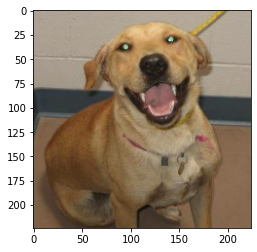

In [ ]:
plt.imshow(images[0].numpy().astype('uint8'))

In [ ]:
pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
#uint8: unsigned integer 8bit(부호가 없는 8비트 정수) 0 ~ 255

In [ ]:
images.shape

TensorShape([32, 224, 224, 3])

In [ ]:
import tensorflow_hub as hub

In [ ]:
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = tf.keras.Sequential([
	tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
	hub.KerasLayer(model_url)
])

In [ ]:
label_file = tf.keras.utils.get_file(origin=
'https://storage.googleapis.com/download.tensorflow.org/data/' + 'ImageNetLabels.txt')

labels = open(label_file).read().splitlines()


24576/10484 [======================================================================] - 0s 0us/step


In [ ]:
predicted = model.predict(images)

In [ ]:
for i in predicted.argmax(axis=1):
  print(labels[i])

Labrador retriever
tabby
Rottweiler
papillon
Boston bull
Walker hound
Saint Bernard
tabby
cocker spaniel
Egyptian cat
tabby
tabby
dingo
Egyptian cat
tabby
Labrador retriever
Brabancon griffon
Egyptian cat
Walker hound
German short-haired pointer
tiger cat
Staffordshire bullterrier
tiger cat
Lhasa
bucket
tabby
Scotch terrier
ram
Irish wolfhound
Samoyed
Siamese cat
Egyptian cat


In [ ]:
labels[251]

'Siberian husky'

In [ ]:
model_url = ('https://tfhub.dev/google/imagenet/'
             'mobilenet_v2_100_224/feature_vector/5')

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    hub.KerasLayer(model_url, trainable=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.binary_crossentropy,
  metrics=['accuracy'])

model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=100, 
    callbacks=[tf.keras.callbacks.EarlyStopping()])


Epoch 1/100
63/63 [==============================] - 71s 1s/step - loss: 0.1860 - accuracy: 0.9445 - val_loss: 0.0729 - val_accuracy: 0.9830
